# Proof of principle  
## One point for q = 1

We want to show that the approximations are working. For this we use an easy differential function. The result of the integral is 1. We only take low degrees of evaluation, because we only want to give a proof of principle. Quantitative evaluations comparisons are made afterwards for on a statistical basis.

In [1]:
import matplotlib.pyplot as plt
import time as time
import pandas as bearcats
import matplotlib.colors as colors

import os
os.chdir("..")
from Methodes_Studienproject.Studienprojekt_Smolyak_qmc_one_point import *


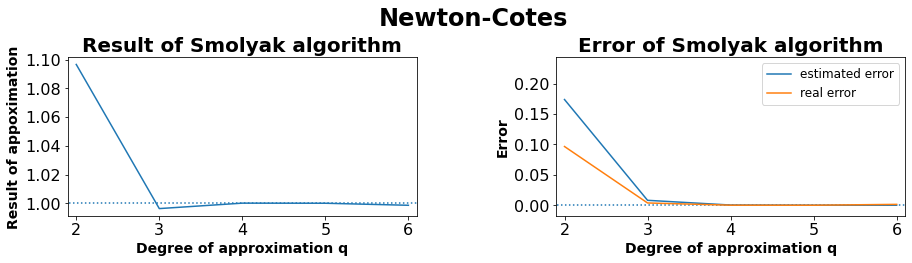

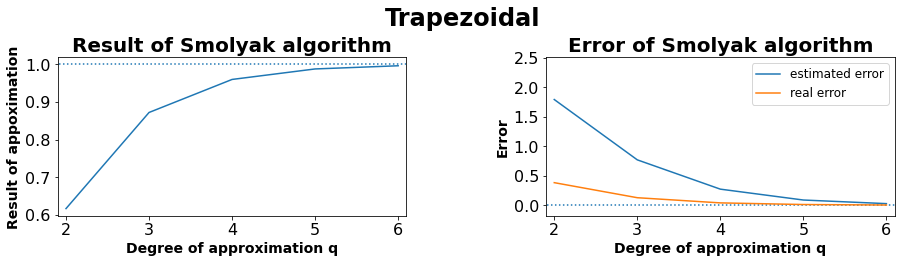

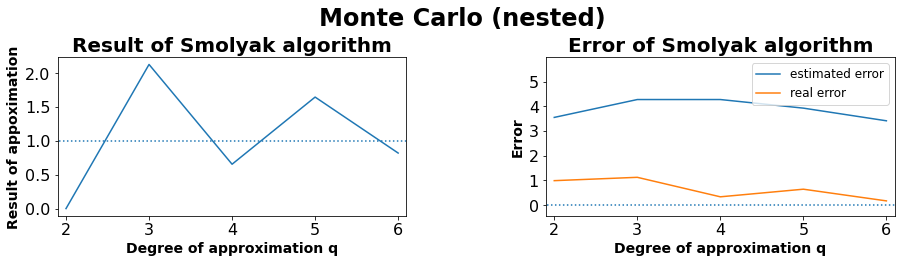

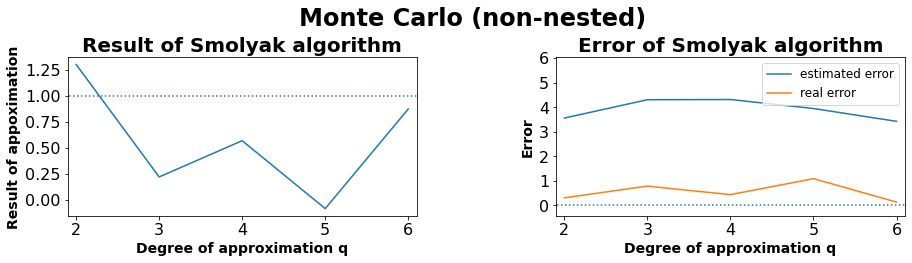

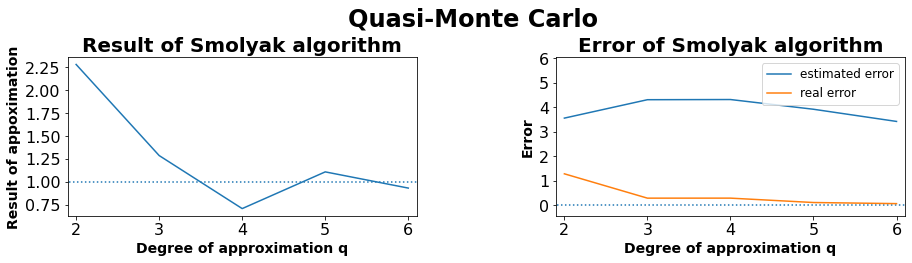

In [2]:
function_string = "pi**2/4 *sin(pi*x)*sin(pi*y)"
variables_string = "(x,y)"
option_list = ["Newton-Cotes",
               "Trapezoidal",
               "Monte Carlo (nested)",
               "Monte Carlo (non-nested)",
               "Quasi-Monte Carlo"]
result_list = []

for i in range(len(option_list)):
    results_quad = []
    for j in  range(2,7):
        results_quad.append(controller_smolyak(function_string, variables_string, option_list[i], j))
    result_list.append(results_quad)

for i in range(5):
    result = [result_list[i][j][0] for j in range(5) ]
    error  = [result_list[i][j][1] for j in range(5) ]
    cost   = [result_list[i][j][2] for j in range(5) ]
    fig = plt.figure(figsize=(15,7))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(2,2,1)
    plt.plot(list(range(2,7)),result)
    plt.hlines(1,0,10, linestyles= "dotted")
    plt.xlim(1.9,6.1)
    plt.xlabel("Degree of approximation q", fontsize = 14,fontweight = "bold")
    plt.ylabel("Result of appoximation",fontsize = 14,fontweight = "bold")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(range(2,7))
    plt.title("Result of Smolyak algorithm", fontsize = 20, fontweight = "bold")

    plt.subplot(2,2,2)
    plt.plot(list(range(2,7)),error, label= "estimated error")
    plt.plot(list(range(2,7)),[abs(x-1) for x in result], label= "real error")
    plt.hlines(0,0,10, linestyles= "dotted")
    plt.xlim(1.9,6.1)
    
    plt.xlabel("Degree of approximation q", fontsize=14,fontweight = "bold")
    plt.ylabel("Error", fontsize=14,fontweight = "bold")
    plt.title("Error of Smolyak algorithm",fontsize = 20,  fontweight="bold")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(range(2,7))
    plt.ylim(-max(error)*0.1,max(error)*1.4)
    plt.legend(fontsize=12, loc=1)
    plt.suptitle(option_list[i],fontsize=24, fontweight="bold")
    plt.show()



The result of the approximation and the error each should converge towards the dotted line. The estimated error for the probabilistic quadratures is not really significant, because the central limit theorem could not be applied here. The probabilistic quadratures for q_i = 1 only uses one point. For this reason these quadratures are less exact.

## Three points for q = 1.

In [11]:
import matplotlib.pyplot as plt
import time as time
from Methodes_Studienproject.Studienprojekt_Smolyak_qmc_three_points import *


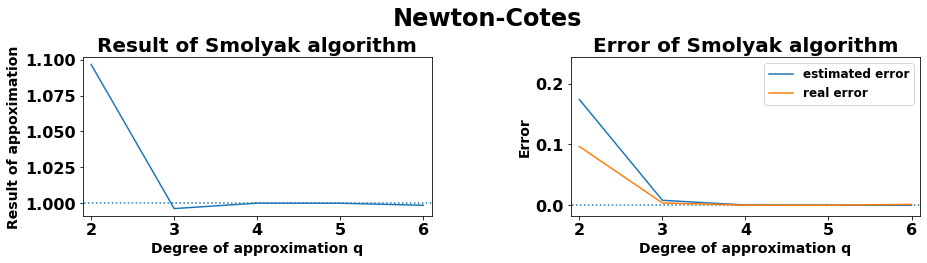

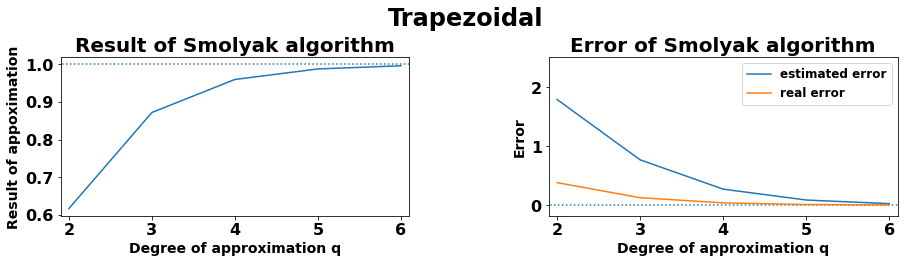

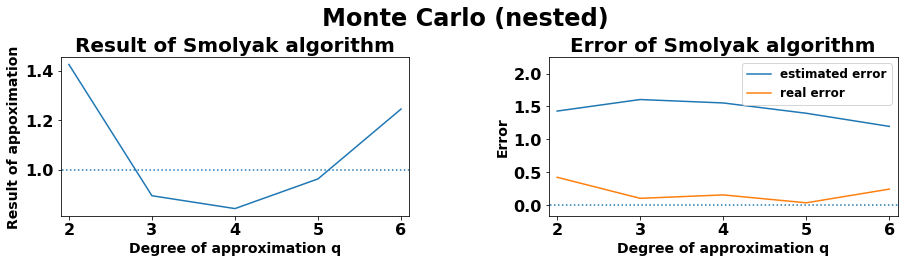

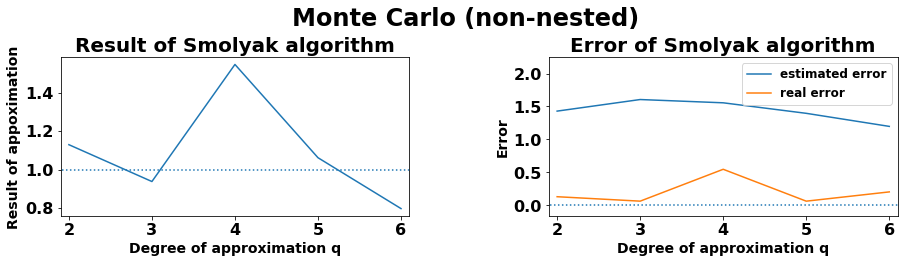

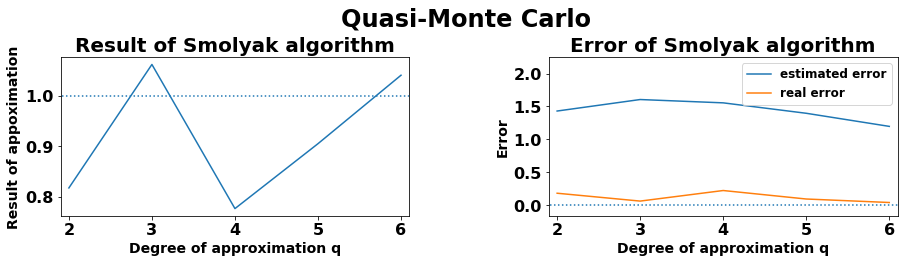

In [12]:
function_string = "pi**2/4 *sin(pi*x)*sin(pi*y)"
variables_string = "(x,y)"
option_list = ["Newton-Cotes",
               "Trapezoidal",
               "Monte Carlo (nested)",
               "Monte Carlo (non-nested)",
               "Quasi-Monte Carlo"]
result_list = []

for i in range(len(option_list)):
    results_quad = []
    for j in  range(2,7):
        results_quad.append(controller_smolyak(function_string, variables_string, option_list[i], j))
    result_list.append(results_quad)

for i in range(5):
    result = [result_list[i][j][0] for j in range(5) ]
    error  = [result_list[i][j][1] for j in range(5) ]
    cost   = [result_list[i][j][2] for j in range(5) ]
    fig = plt.figure(figsize=(15,7))
    plt.subplots_adjust(hspace=0.4, wspace=0.4)

    plt.subplot(2,2,1)
    plt.plot(list(range(2,7)),result)
    plt.hlines(1,0,10, linestyles= "dotted")
    plt.xlim(1.9,6.1)
    plt.xlabel("Degree of approximation q", fontsize = 14,fontweight = "bold")
    plt.ylabel("Result of appoximation",fontsize = 14,fontweight = "bold")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(range(2,7))
    plt.title("Result of Smolyak algorithm", fontsize = 20, fontweight = "bold")

    plt.subplot(2,2,2)
    plt.plot(list(range(2,7)),error, label= "estimated error")
    plt.plot(list(range(2,7)),[abs(x-1) for x in result], label= "real error")
    plt.hlines(0,0,10, linestyles= "dotted")
    plt.xlim(1.9,6.1)
    
    plt.xlabel("Degree of approximation q", fontsize=14,fontweight = "bold")
    plt.ylabel("Error", fontsize=14,fontweight = "bold")
    plt.title("Error of Smolyak algorithm",fontsize = 20,  fontweight="bold")
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xticks(range(2,7))
    plt.ylim(-max(error)*0.1,max(error)*1.4)
    plt.legend(fontsize=12, loc=1)
    plt.suptitle(option_list[i],fontsize=24, fontweight="bold")
    plt.show()



The result of the approximation and the error each should converge towards the dotted line. The estimated error for the probabilistic quadratures is not really significant, because the central limit theorem could not be applied here. The probabilistic quadratures for q_i = 1 here use three points. 

## Higher dimension

### Approximation of constant

In the end, we want to show that the algorithm is working correct in different dimension. For this we first calculate the integral $f_d(\vec{x}) = 1$, to see, if the Smolyak algorithm is working well. Here the only interesting point is the difference of the result to 1. This should be sufficiently small to be explainable by the machine epsilon. 
After this we  calculated the integral of $f_d(\vec{x}) = 2^d \cdot \prod_{i=0}^d x_i$ on the interval $[0,1]^d$. This integral is approximated exact by the trapezoidal quadrature. Apart from that an impression of  the error for the non-deterministic quadratures.  
The data is loaded, because the calculation  takes about  10 minutes. The calculations are repeated 10 times for q = d + 10.

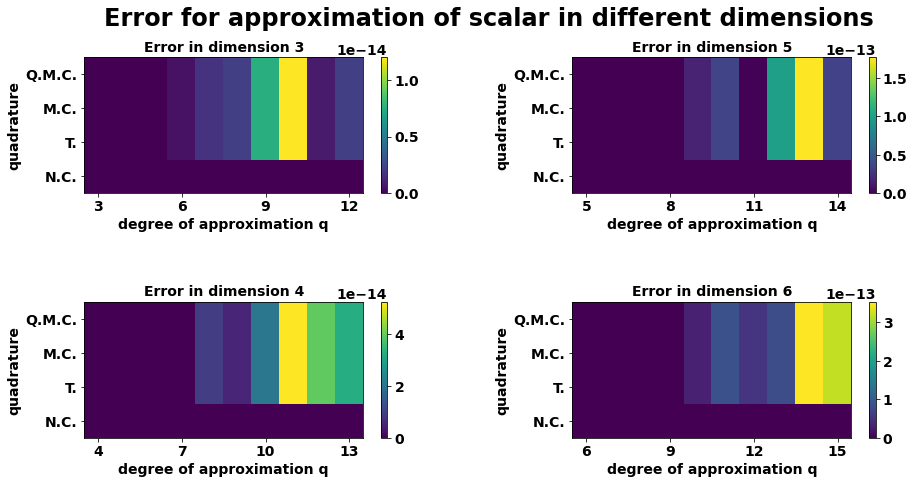

In [13]:
color_str = [ "fuchsia", "navy", "limegreen", "red"]

plt.rc('font', size=14, weight="bold")
os.chdir("Data")
approx_simple_highdim_fct = bearcats.read_pickle("integral_over_one.pkl")
np.mean(approx_simple_highdim_fct["2, results"],axis=2).shape
fig, ax = plt.subplots(2,2,figsize=(15,7))


for dim in range(3,7):
    error = abs(1 - np.mean(approx_simple_highdim_fct[str(dim) + ", results"],axis=2))
    
    
    # Time plot
    
    plt.subplots_adjust(hspace=0.8, wspace=0.4)

    mat = ax[(dim-3)%2, int((dim-3)/2)].pcolor(error)
    fig.colorbar(mat, ax=ax[(dim-3)%2, int((dim-3)/2)])
    
    ax[(dim-3)%2, int((dim-3)/2)].set_ylabel("quadrature",fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_yticks([0.5,1.5,2.5,3.5])
    ax[(dim-3)%2, int((dim-3)/2)].set_yticklabels(["N.C.","T.", "M.C.", "Q.M.C."],fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_xlabel("degree of approximation q",fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_xticks([0.5,3.5,6.5,9.5])
    ax[(dim-3)%2, int((dim-3)/2)].set_xticklabels([dim,dim+3,dim+6,dim+9],fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_title("Error in dimension "+ str(dim),fontsize=14, fontweight="bold")
    
fig.suptitle("Error for approximation of scalar in different dimensions\n", fontsize=24,fontweight="bold")

plt.show()

It turns out that the error is in the suspected range of the machine epsilon. Furthermore, it is not systematically increasing with q. This means that the different summands used in the Smolyak algorithm are summed up in a proper way.  The calculation was repeated 25 times and every time the error stayed the same.

The bottom line is 0, because the Newton-Cotes algorithm could not be applied for any one-dimensional q bigger 5. Up to that point no error occurred.

### Approximation of simple analytical function

Next we show the results of the approximation.

First we show the average of 25 calculation. As mentioned the deterministic quadratures are exact for this functions.

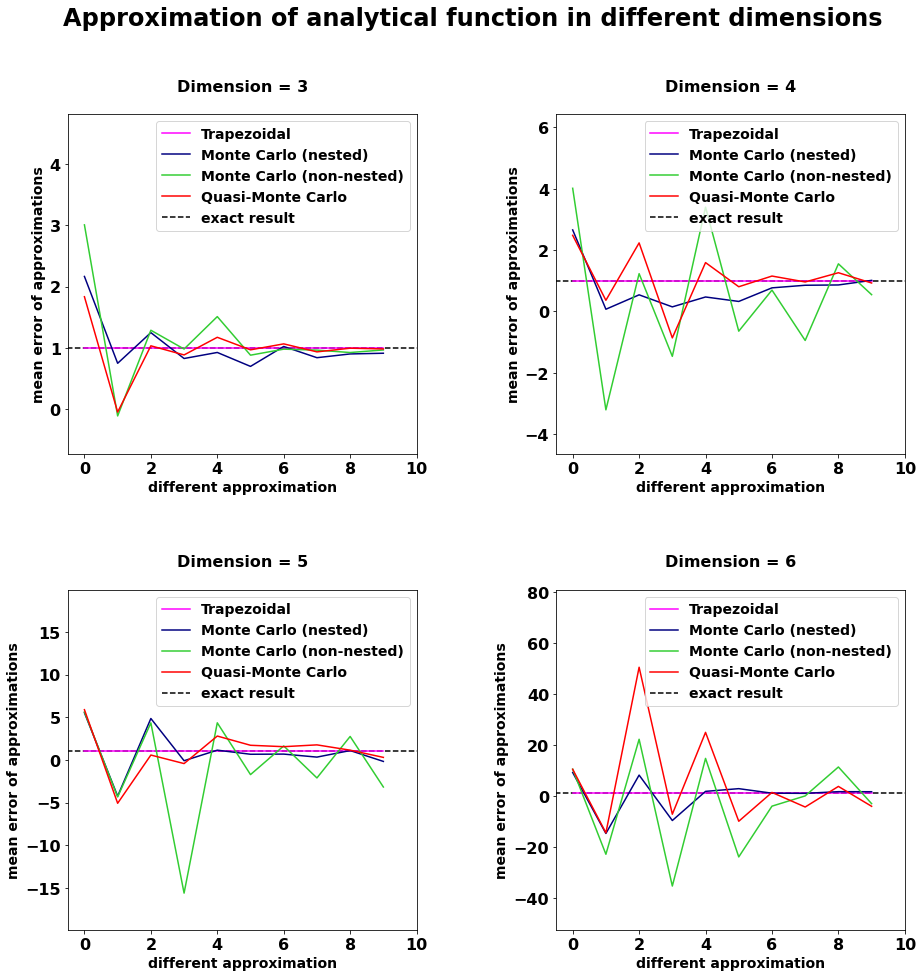

In [14]:
color_str = [ "fuchsia", "navy", "limegreen", "red"]


approx_simple_highdim_fct = bearcats.read_pickle("integral_over_polynomial.pkl")
fig = plt.figure(figsize=(15,15))


for dim in range(3,7):
    approx = np.mean(approx_simple_highdim_fct[str(dim) + ", results"], axis=2)
    
    
    # Time plot
    
    plt.subplots_adjust(hspace=0.4, wspace=0.4)
    plt.subplot(2,2,dim-2)
    
    for k_1 in range( approx.shape[0]):
        plt.plot((approx[k_1,:]), color = color_str[k_1], label=option_list[k_1+1])
    
    plt.xlim(-0.5,10,5)
    plt.hlines(1, xmin=-1, xmax = 11, linestyles="--", color= "black", label="exact result")
    plt.legend(loc=1)
    plt.ylabel("mean error of approximations",fontsize = 14,fontweight = "bold")
    plt.xlabel("different approximation",fontsize = 14,fontweight = "bold")
    plt.ylim(np.max(approx)- abs(np.max(approx)-np.min(approx))*1.2, np.max([np.max(approx)*1.6,abs(np.max(approx)- abs(np.max(approx)-np.min(approx))*1.2)]))
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.title("Dimension = " + str(dim)+"\n", fontsize = 16,fontweight = "bold")
fig.suptitle("Approximation of analytical function in different dimensions", fontsize=24,fontweight="bold")

plt.show()

The deterministic quadratures are exact. The non deterministic quadratures tend to be relatively inaccurate especially in higher dimensions

Now the errors of the non-deterministic approximations are shown in a logarithmic scale. 

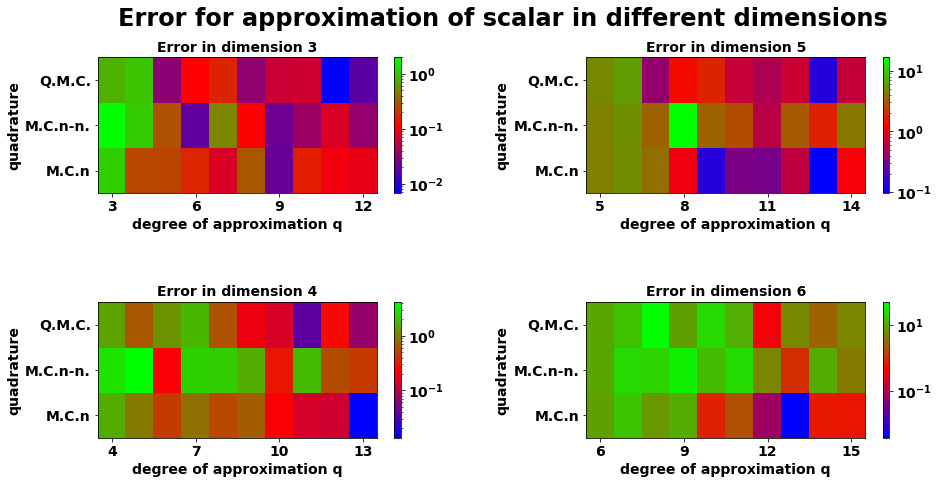

In [15]:
plt.rc('font', size=14, weight="bold")
approx_simple_highdim_fct = bearcats.read_pickle("integral_over_polynomial.pkl")


fig, ax = plt.subplots(2,2,figsize=(15,7))


for dim in range(3,7):
    error = abs(1 - np.mean(approx_simple_highdim_fct[str(dim) + ", results"][1:,:],axis=2))
    
    
    # Time plot
    
    plt.subplots_adjust(hspace=0.8, wspace=0.4)

    mat = ax[(dim-3)%2, int((dim-3)/2)].pcolor(error,norm=colors.LogNorm(vmin=error.min(), vmax=error.max()),
                   cmap='brg')
    fig.colorbar(mat, ax=ax[(dim-3)%2, int((dim-3)/2)])
    
    ax[(dim-3)%2, int((dim-3)/2)].set_ylabel("quadrature",fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_yticks([0.5,1.5,2.5])
    ax[(dim-3)%2, int((dim-3)/2)].set_yticklabels(["M.C.n", "M.C.n-n.", "Q.M.C."],fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_xlabel("degree of approximation q",fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_xticks([0.5,3.5,6.5,9.5])
    ax[(dim-3)%2, int((dim-3)/2)].set_xticklabels([dim,dim+3,dim+6,dim+9],fontsize=14, fontweight="bold")
    ax[(dim-3)%2, int((dim-3)/2)].set_title("Error in dimension "+ str(dim),fontsize=14, fontweight="bold")
    
    
fig.suptitle("Error for approximation of scalar in different dimensions\n", fontsize=24,fontweight="bold")
plt.show()

In [1]:
'''
import Methodes_Studienproject.Studienprojekt_Smolyak_qmc_one_point as Studieproject_one
import numpy as np
import time 
import pandas as bearcats

# for proof of pronciple 
variables = ["(x_1)"]
#function = ["1"]
functions = ["2 * x_1"]
option_list = ["Trapezoidal",
               "Monte Carlo (nested)",
               "Monte Carlo (non-nested)",

               "Quasi-Monte Carlo"]
repetions = 25
results = {}
for dim in range(2,7):
    print(dim)
    variables.append(variables[-1][:-1]+", x_"+ str(dim)+")")
    functions.append(functions[-1]+"* 2 * x_"+str(dim))
    # functions.append(functions[-1])
    results_one_dim= np.empty((4,10,repetions,3))
    run_times = np.empty((4))
    for k_1 in range(len(option_list)):
        
        start = time.time() 
        for k_3  in range(dim,dim+10):
            print(k_3)
            for k_2 in range(repetions):
                results_one_dim[k_1, k_3-dim, k_2, :] = Studieproject_one.controller_smolyak(functions[-1], variables[-1], option_list[k_1], k_3)
            run_times[k_1] = (time.time()-start)/25
    new_results = { str(dim)+ ", results": results_one_dim[:,:,:,0], str(dim)+ ", time": run_times}
    results.update(new_results)
bearcats.to_pickle(results,"integral_over_polynomial.pkl")
# bearcats.to_pickle(results,"integral_over_one.pkl")
'''
print("If you want to generate data, remove quotation marks.")

If you want to generate data, remove quotation marks.
